<h1 style="color:blue"> Part B : News Article Classification</h1>

<h3> 1. Overview</h3>

<p> In today’s digital world, news articles are constantly being generated and shared across
 different platforms. For news organizations, social media platforms, and aggregators,
 classifying articles into specific categories such as sports, politics, and technology can help
 improve content management and recommendation systems. This project aims to develop a
 machine learning model that can classify news articles into predefined categories, such as
 sports, politics, and technology, based on their content.
 By automating this process, organizations can efficiently categorize large volumes of news
 articles, making it easier for readers to access relevant information based on their interests</p>

<h3> 2. Problem Statement</h3>

<p> The primary objective of this project is to build a classification model that can automatically
 categorize news articles into different predefined categories. The model will be trained using
 a labeled dataset of news articles and will output the most likely category (e.g., sports,
 politics, or technology) for any given article.<br>
 The goal is to:<br>
 ● Develop a robust classifier capable of handling articles from multiple categories.<br>
 ● Preprocess the text data, extract meaningful features, and train models to classify the
 articles.<br>
 ● Evaluate the model performance and provide actionable insights on how well it
 classifies articles.</p>

 <h3>3. Dataset Information</h3>

 The dataset can be used from <a href="https://docs.google.com/spreadsheets/d/1m4YMfqQxo_DcbtzGqbfZitvJmytbWUE8qjixhHmtadk/edit?usp=sharing">DataSet</a>

In [21]:
import numpy as np
import pandas as pd

<h3> 1. Data Collection and Preprocessing</h3>

In [22]:
df_news = pd.read_csv("data_news - data_news.csv")

In [23]:
df_news.head()

,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods


In [24]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           50000 non-null  object
 1   headline           50000 non-null  object
 2   links              50000 non-null  object
 3   short_description  50000 non-null  object
 4   keywords           47332 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


In [25]:
import re

In [26]:
df_news = df_news.drop(columns=["links"])

<h3> 2. Feature Extraction</h3>

In [28]:
df_news["keywords"] = df_news["keywords"].fillna("")

In [29]:
df_news["text"] = df_news["headline"] + " " + df_news["short_description"] + " " + df_news["keywords"]

In [30]:
def preprocess_text(text):
    text = text.lower()  
    text = re.sub(r'<.*?>', ' ', text)  
    text = re.sub(r'[^a-zA-Z\s]', '', text) 
    text = re.sub(r'\s+', ' ', text).strip()  
    return text

In [31]:
df_news["cleaned_text"] = df_news["text"].apply(preprocess_text)

In [32]:
df_news[["category", "cleaned_text"]].head()

,category,cleaned_text
0,WELLNESS,miles in days lessons learned resting is part ...
1,WELLNESS,talking to yourself crazy or crazy helpful thi...
2,WELLNESS,crenezumab trial will gauge whether alzheimers...
3,WELLNESS,oh what a difference she made if you want to b...
4,WELLNESS,green superfoods first the bad news soda bread...


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer


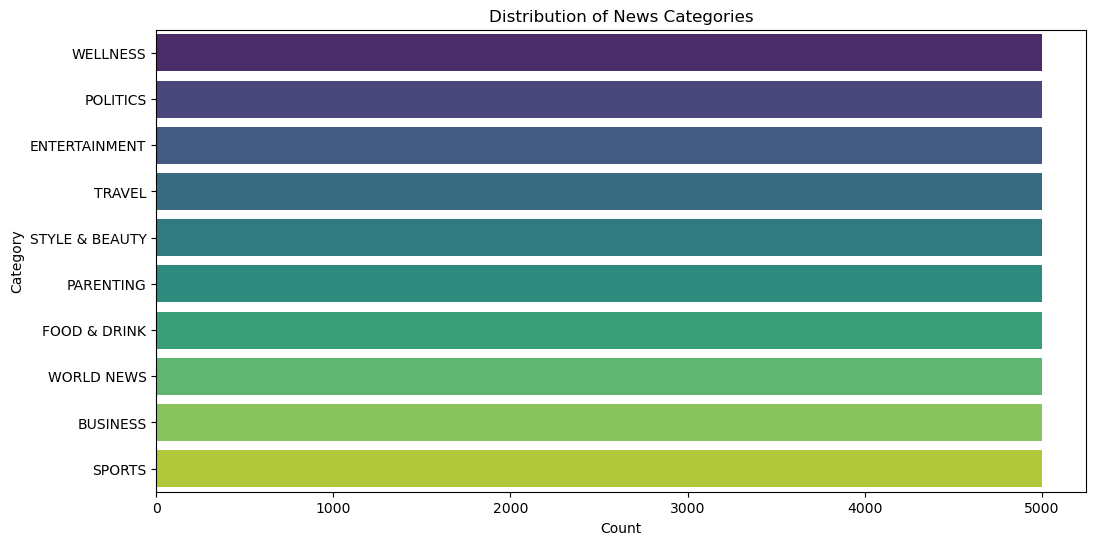

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df_news["category"], order=df_news["category"].value_counts().index, palette="viridis")
plt.xlabel("Count")
plt.ylabel("Category")
plt.title("Distribution of News Categories")
plt.show()

In [36]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_tfidf = tfidf_vectorizer.fit_transform(df_news["cleaned_text"])

In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_labels = label_encoder.fit_transform(df_news["category"])

In [38]:
X_tfidf.shape, len(set(y_labels))

((50000, 5000), 10)

<h3> 3. Model Development and Training</h3>

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_labels, test_size=0.2, random_state=42)

In [45]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(kernel='linear')
}

In [46]:
model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    model_results[name] = accuracy

model_results

{'Logistic Regression': 0.7901,
 'Naive Bayes': 0.7771,
 'Support Vector Machine': 0.7831}

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

evaluation_results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    
    evaluation_results[name] = {
        "Classification Report": report,
        "Confusion Matrix": cm.tolist()
    }

evaluation_results

{'Logistic Regression': {'Classification Report': {'BUSINESS': {'precision': 0.7201923076923077,
    'recall': 0.7842931937172775,
    'f1-score': 0.750877192982456,
    'support': 955},
   'ENTERTAINMENT': {'precision': 0.7657841140529531,
    'recall': 0.7634517766497462,
    'f1-score': 0.764616166751398,
    'support': 985},
   'FOOD & DRINK': {'precision': 0.8348258706467662,
    'recall': 0.821743388834476,
    'f1-score': 0.8282329713721619,
    'support': 1021},
   'PARENTING': {'precision': 0.7803410230692076,
    'recall': 0.7553398058252427,
    'f1-score': 0.7676369018253577,
    'support': 1030},
   'POLITICS': {'precision': 0.7812177502579979,
    'recall': 0.7321083172147002,
    'f1-score': 0.7558662006989516,
    'support': 1034},
   'SPORTS': {'precision': 0.8689175769612711,
    'recall': 0.8793969849246231,
    'f1-score': 0.8741258741258742,
    'support': 995},
   'STYLE & BEAUTY': {'precision': 0.8622129436325678,
    'recall': 0.8377281947261663,
    'f1-score':

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

for name, model in models.items():
    y_pred = model.predict(X_test)
    
    print(f"Model: {name}\n")
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 80)

Model: Logistic Regression

Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.72      0.78      0.75       955
 ENTERTAINMENT       0.77      0.76      0.76       985
  FOOD & DRINK       0.83      0.82      0.83      1021
     PARENTING       0.78      0.76      0.77      1030
      POLITICS       0.78      0.73      0.76      1034
        SPORTS       0.87      0.88      0.87       995
STYLE & BEAUTY       0.86      0.84      0.85       986
        TRAVEL       0.80      0.78      0.79      1008
      WELLNESS       0.72      0.76      0.74      1009
    WORLD NEWS       0.77      0.79      0.78       977

      accuracy                           0.79     10000
     macro avg       0.79      0.79      0.79     10000
  weighted avg       0.79      0.79      0.79     10000

Confusion Matrix:
 [[749  18  13  17  53  11   6  10  49  29]
 [ 27 752  14  36  29  33  31  18  25  20]
 [ 21  19 839  20   7  15  14  36  39  11]
 [ 26  33  17

<h1>Video Description</h1>

<a href="">Discription</a>